In [8]:
import pandas as pd
import numpy as np

def read_file(file_path):
    df = pd.read_csv(file_path, sep='\t')
    return df
motivation_df = read_file('../monitor/motivation_goodput_vs_num_devices_cv/final_motivation.tsv')
motivation_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../monitor/motivation_goodput_vs_num_devices_cv/final_motivation.tsv'

In [2]:
motivation_df['policy_name'].unique()
# 将df中包含'sr-replace'的值替换为'sr-replace'
motivation_df = motivation_df.replace('sr-replace-600', 'sr-replace')
motivation_df = motivation_df.replace('sr-replace-60', 'sr-replace')
motivation_df = motivation_df.replace('heuristic-dynamic', 'AdaptServe')
motivation_df = motivation_df.replace('dqn-dynamic', 'AdaptServe')
# rate_df = rate_df.replace('my-mp-ilp', 'mp-ilp')
# rate_df = rate_df.replace('my-mp-ilp-dynamic', 'mp-ilp-dynamic')
# rate_df = rate_df.replace('my-mp-ilp-replace-600', 'mp-ilp-replace-600')

In [3]:
motivation_df.tail()

,exp_name,num_models,model_groups_num,num_devices,num_devices_per_node,mem_budget,total_rate,rate_distribution,arrival_process,arrival_process_kwargs,slo_scale,duration,policy_name,placement,goodput,mode,solver_time
4,motivation_goodput_vs_num_devices_cv,12,2,8,8,13958643712,10.0,power_law,mixed,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,3600,AdaptServe,ModelPlacementWithReplacement(num_segments=646),0.524,simulate,0.001
5,motivation_goodput_vs_num_devices_cv,12,2,8,8,13958643712,10.0,power_law,mixed,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,3600,sr-replace,ModelPlacementWithReplacement(num_segments=60),0.429,simulate,5.712
6,motivation_goodput_vs_num_devices_cv,12,2,20,8,13958643712,-1.0,NaN,azure_v1,"{'rate_scale': 0.005, 'cv_scale': 9.0, 'trace_...",5,3600,mp-search-sep,ModelPlacement(group_configs=(ParallelConfig(d...,0.778,simulate,15.842
7,motivation_goodput_vs_num_devices_cv,12,2,20,8,13958643712,-1.0,NaN,azure_v1,"{'rate_scale': 0.005, 'cv_scale': 9.0, 'trace_...",5,3600,AdaptServe,ModelPlacementWithReplacement(num_segments=2),0.849,simulate,0.001
8,motivation_goodput_vs_num_devices_cv,12,2,20,8,13958643712,-1.0,NaN,azure_v1,"{'rate_scale': 0.005, 'cv_scale': 9.0, 'trace_...",5,3600,sr-replace,ModelPlacementWithReplacement(num_segments=60),0.635,simulate,9.968


/tmp/ipykernel_25798/1103715339.py:152: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 1], pad=1)


输出图表到 main_result.pdf


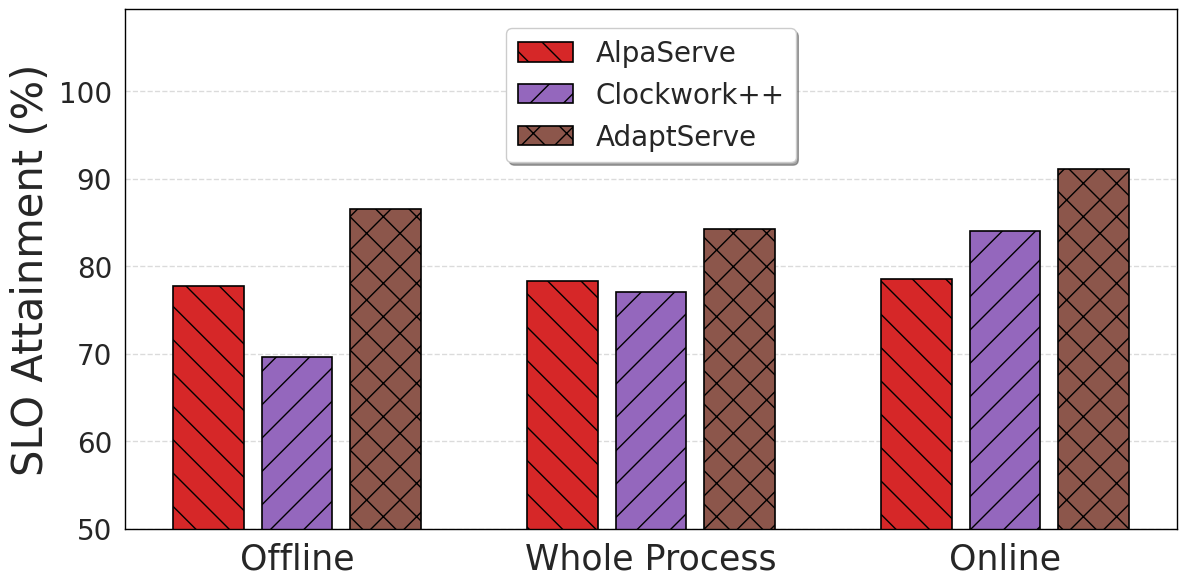

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 假设这些辅助函数和变量已经定义
def method2order(method):
    # 定义方法的排序逻辑
    order = {
        "AlpaServe": 1,
        "Clockwork++": 2,
        "AdaptServe": 3,
        # "heuristic-dynamic": 1,
        # "dqn-dynamic": 2,
        # "mp-ilp-dynamic": 3,
        # "sr-replace-dynamic": 4,
        # 'mp-ilp': 5,
        # 'mp-search-sep': 6,
        # 'sr-greedy': 7,
        # 添加其他策略
    }
    return order.get(method, 99)

def show_name(method):
    # 定义方法的显示名称
    names = {
        "sr-replace": "Clockwork++",
        "AdaptServe": "AdaptServe",
        "mp-search-sep": "AlpaServe",
        # "heuristic-dynamic": "Heuristic-Dynamic",
        # "dqn-dynamic": "DQN-Dynamic",
        # "mp-ilp-dynamic": "ILP-Dynamic",
        # "sr-replace-dynamic": "SR-Dynamic",
        # 'mp-ilp': 'ILP',
        # 'mp-search-sep': 'AlpaServe',
        # 'sr-greedy': 'SR',
        # 'sr-replace': 'Clock++',
        # 添加其他策略名称
    }
    return names.get(method, method)

# 定义颜色和填充样式
methodcolors = sns.color_palette("Set2", 10)  # 根据需要调整数量
methodcolors = [ '#d62728', '#9467bd', '#8c564b', '#ff7f0e', '#2ca02c','#1f77b4',]
methodhatches = ['\\', '/', '\/', '---', '+++', 'xxx', 'ooo', 'OOO', '...', '***']

def plot_goodput_comparison_bar(df, policies, target, x_labels=None, xlabel='Target Variable', 
                                output='goodput_comparison_bar.png', ybottom=0, plot_legend=True):
    """
    绘制不同 arrival_process 下不同策略的 Goodput 随目标变量变化的柱状图，并将图例放在上方。
    """
    sns.set(style="whitegrid")

    # 定义数据
    # 这里我们直接将您的数据添加到 DataFrame 中
    data = {
        'policy_name': ['AlpaServe', 'Clockwork++', 'AdaptServe', 'AlpaServe', 'Clockwork++', 'AdaptServe', 'AlpaServe', 'Clockwork++', 'AdaptServe'],
        'goodput': [0.777, 0.696, 0.865, 0.783, 0.77, 0.842, 0.785, 0.840, 0.911],
        'stage': ['Offline', 'Offline', 'Offline', 'Whole Process', 'Whole Process', 'Whole Process','Online', 'Online', 'Online'],
    }
    
    # 转换为 DataFrame
    df = pd.DataFrame(data)
    
    # 处理目标标签
    if x_labels is None:
        x_labels = ['Offline', 'Whole Process', 'Online']

    num_policies = len(policies)
    num_targets = len(x_labels)

    # 定义每组柱状图的宽度和位置
    total_group_width = 0.7
    spacing_ratio = 0.25
    bar_width = total_group_width / (num_policies + (num_policies - 1) * spacing_ratio)
    spacing = bar_width * spacing_ratio

    x = np.arange(num_targets)  # 目标变量的位置

    # 设置图形尺寸，并启用 constrained_layout
    fig_width = max(12, 0.5 * num_targets)
    fig, ax = plt.subplots(figsize=(fig_width, 6), constrained_layout=True)

    all_bars = []
    all_legends = []

    y_max_global = 0
    goodput_dict = {policy: [] for policy in policies}

    for policy in policies:
        for stage in x_labels:
            df_policy_stage = df[(df['policy_name'] == policy) & (df['stage'] == stage)]
            if not df_policy_stage.empty:
                mean_goodput = df_policy_stage['goodput'].mean() * 100  # 转换为百分比
            else:
                mean_goodput = np.nan
            goodput_dict[policy].append(mean_goodput)

        # 更新 y_max_global
        current_max = max([val for val in goodput_dict[policy] if not np.isnan(val)] + [0])
        y_max_global = max(y_max_global, current_max)

    # 绘制每个策略的柱状图
    for i, policy in enumerate(sorted(policies, key=lambda x: method2order(x))):
        # 计算每个柱的位置，确保柱子居中且有空隙
        offset = (i * (bar_width + spacing)) - (total_group_width / 2) + bar_width / 2
        bar_positions = x + offset

        # 提取当前策略的 Goodput 数据
        goodput_values = goodput_dict[policy]

        # 绘制柱状图，处理缺失数据
        bars = ax.bar(bar_positions, 
                      [val if not np.isnan(val) else 0 for val in goodput_values],
                      width=bar_width,
                      color=methodcolors[i % len(methodcolors)],
                      hatch=methodhatches[i % len(methodhatches)],
                      label=show_name(policy),
                      edgecolor='black',
                      linewidth=1.2)

        all_bars.append(bars[0])
        all_legends.append(show_name(policy))

    # 设置轴标签和标题
    ax.set_xlabel(xlabel, fontsize=30, labelpad=10) 
    ax.set_ylabel("SLO Attainment (%)", fontsize=30, labelpad=5)
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=30, ha='center', rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=25)

    # 设置 Y 轴范围
    ax.set_ylim(bottom=ybottom, top=max(y_max_global * 1.2, 100))

    # 仅显示横向网格线
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.grid(False, axis='x')

    # 确保边框可见
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)
        spine.set_color('black')

    # 添加统一的图例在图表内部的右上角
    if plot_legend:
        ax.legend(all_bars, all_legends, fontsize=20, 
                  loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=1,
                  frameon=True, fancybox=True, shadow=True)

    plt.tight_layout(rect=[0, 0, 1, 1], pad=1)
    fig.set_size_inches(fig_width, 6)

    # 保存并显示图形
    plt.savefig(output, bbox_inches='tight', dpi=300)
    print(f"输出图表到 {output}")
    plt.show()


# 调用绘图函数
plot_goodput_comparison_bar(
    df=None,  # 数据已在内部定义
    policies=['AlpaServe', 'Clockwork++', 'AdaptServe'],
    target=None,  # 数据已在内部定义
    x_labels=['Offline', 'Whole Process', 'Online'],
    xlabel='', 
    output='main_result.pdf', 
    ybottom=50, 
    plot_legend=True
)
